Problem: Write a python program to find the polynomials of degrees n= 3,7,15,21 that approximate f(x) = 1/(1+x^2)  from  60 points of this function corresponding to 60 equidistant x  points in the interval [-5,5].  Apply LU,  QR, and SVD methods to find the polynomial approximations.  Draw polynomials from each method and data in the same graph.  Calculate and plan errors for each case. Using the sklearn library.

Include the library

In [63]:
import numpy as np
from scipy.linalg import qr
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

Define the function f(x) = 1/(1+x^2).

In [64]:
def f(x):
    return 1/( 1 + x**2)

Generate 60 equidistant x points in the interval [-5,5].

In [65]:
x = np.linspace(-5, 5, 60)

Calculate the corresponding y values for each x point using the function f(x).

In [66]:
y = f(x)

Fit polynomial models_QR of degrees 3, 7, 15, and 21.

In [67]:
degrees = [3, 7, 15, 21]

Initialize the arrays to store the coefficients and errors of the polynomials

In [68]:
coefficients = np.zeros((len(degrees), max(degrees) + 1))
errors = np.zeros(len(degrees))

Generated data using the QR decomposition method.

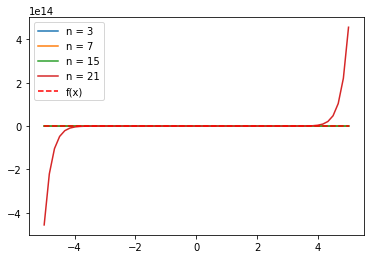

Coefficients:
[[ 5.03547518e-01  3.24062021e-17 -2.70213777e-02 -3.88364618e-18
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 7.72836861e-01  6.73558608e-16 -1.77992578e-01 -2.21039368e-16
   1.31530152e-02  1.95341739e-17 -2.94369582e-04 -4.91683143e-19
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 9.53796367e-01 -2.64992438e-14 -5.88076354e-01  2.81632299e-14
   1.86271016e-01 -8.07906951e-15 -3.09732711e-02  1.07981112e-15
   2.83038059e-03 -7.70352280e-17 -1.42943690e-04  3.04708725e-18
   3.73633865e-06 -6.63110182e-20 -3.94126948e-08  6.65068

In [69]:
for i, n in enumerate(degrees):
    # Generate the Vandermonde matrix
    V = np.vander(x, n+1, increasing=True)
    
    # Apply QR decomposition to the Vandermonde matrix
    Q, R = qr(V, mode='economic')
    
    # Solve the least squares problem to find the coefficients of the polynomial
    c = np.linalg.solve(R[:n+1, :], np.dot(Q.T, f(x)))
    coefficients[i, :n+1] = c
    
    # Evaluate the polynomial at the x points
    y = np.polyval(c, x)
    
    # Calculate the error of the polynomial
    errors[i] = mean_squared_error(f(x), y)
    
    # Plot the polynomial and data on the same graph
    plt.plot(x, y, label=f'n = {n}')

plt.plot(x, f(x), 'r--', label='f(x)')
plt.legend()
plt.show()

# Print the coefficients and errors of the polynomials
print('Coefficients:')
print(coefficients)
print('Errors:')
print(errors)

Generated data using the SVD decomposition method.

Initialize the arrays to store the coefficients and errors of the polynomials.

In [70]:
coefficients = np.zeros((len(degrees), max(degrees) + 1))
errors = np.zeros(len(degrees))

Loop over the degrees of the polynomials to approximate f(x) using the SVD method

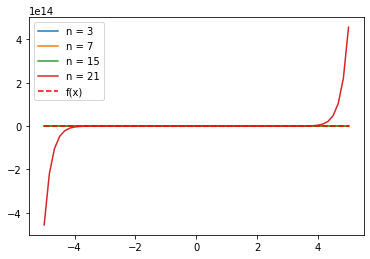

Coefficients:
[[ 5.03547518e-01  3.20923843e-17 -2.70213777e-02 -4.70272692e-18
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 7.72836861e-01  4.10370522e-16 -1.77992578e-01 -1.44415729e-16
   1.31530152e-02  4.26091454e-17 -2.94369582e-04 -1.56383458e-18
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 9.53796366e-01  1.29556323e-10 -5.88076354e-01 -1.25844131e-11
   1.86271016e-01 -2.25847802e-12 -3.09732711e-02  1.55806520e-13
   2.83038059e-03 -2.87145524e-15 -1.42943690e-04  2.47963178e-16
   3.73633865e-06  1.16165937e-18 -3.94126948e-08  1.04107

In [71]:
for i, n in enumerate(degrees):
    # Generate the Vandermonde matrix
    V = np.vander(x, n+1, increasing=True)
    
    # Apply SVD decomposition to the Vandermonde matrix
    U, s, VT = np.linalg.svd(V, full_matrices=False)
    S_inv = np.diag(1 / s)
    
    # Solve the least squares problem to find the coefficients of the polynomial
    c = VT.T @ S_inv @ U.T @ f(x)
    coefficients[i, :n+1] = c
    
    # Evaluate the polynomial at the x points
    y = np.polyval(c, x)
    
    # Calculate the error of the polynomial
    errors[i] = mean_squared_error(f(x), y)
    
    # Plot the polynomial and data on the same graph
    plt.plot(x, y, label=f'n = {n}')
    
plt.plot(x, f(x), 'r--', label='f(x)')
plt.legend()
plt.show()

# Print the coefficients and errors of the polynomials
print('Coefficients:')
print(coefficients)
print('Errors:')
print(errors)

Generated data using the LU decomposition method.

Initialize the arrays to store the coefficients and errors of the polynomials.

In [72]:
coefficients = np.zeros((len(degrees), max(degrees) + 1))
errors = np.zeros(len(degrees))

Loop over the degrees of the polynomials to approximate f(x) LU method.

In [73]:
def create_vandermonde_matrix(x, degree):
    A = np.vander(x, degree + 1, increasing=True)
    return A

In [80]:
x = np.linspace(-5, 5, 60)
f = 1 / (1 + x**2)

In [81]:

# Fit a polynomial of degree 3
A = create_vandermonde_matrix(x, 3)
reg3 = LinearRegression().fit(A, f)
c3 = reg3.coef_

# Fit a polynomial of degree 7
A = create_vandermonde_matrix(x, 7)
reg7 = LinearRegression().fit(A, f)
c7 = reg7.coef_

# Fit a polynomial of degree 15
A = create_vandermonde_matrix(x, 15)
reg15 = LinearRegression().fit(A, f)
c15 = reg15.coef_

# Fit a polynomial of degree 21
A = create_vandermonde_matrix(x, 21)
reg21 = LinearRegression().fit(A, f)
c21 = reg21.coef_

In [109]:
def calculate_error(x, f, c):
    p = np.polyval(c, x)
    return np.sum((f - p)**2) / x.size

In [110]:
# Calculate the approximation error for the polynomial of degree 3
error3 = calculate_error(x, f, c3)

# Calculate the approximation error for the polynomial of degree 7
error7 = calculate_error(x, f, c7)

# Calculate the approximation error for the polynomial of degree 15
error15 = calculate_error(x, f, c15)

# Calculate the approximation error for the polynomial of degree 21
error21 = calculate_error(x, f, c21)

In [111]:
print(f"Polynomial of degree 3 error: {error3:.4f}")
print(f"Polynomial of degree 7 error: {error7:.4f}")
print(f"Polynomial of degree 15 error: {error15:.4f}")
print(f"Polynomial of degree 21 error: {error21:.4f}")

Polynomial of degree 3 error: 0.1603
Polynomial of degree 7 error: 32873.9717
Polynomial of degree 15 error: 27854347372479252.0000
Polynomial of degree 21 error: 10146793260282150903611392.0000


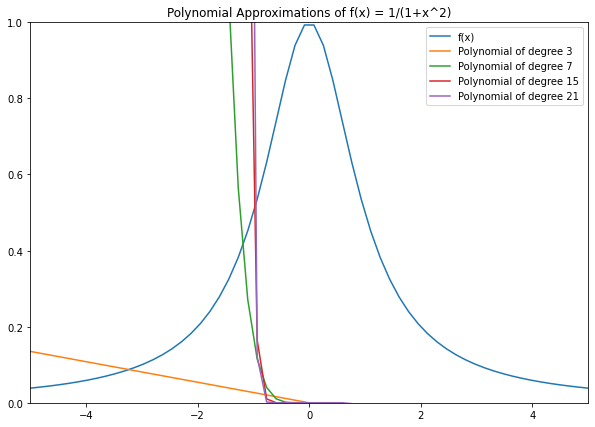

In [108]:
# Step 5: Plot the original function and the polynomial approximations on the same graph.
fig, ax = plt.subplots(figsize=(10, 7))

# Plot the original function
ax.plot(x, f, label="f(x)")

# Plot the polynomial approximations
ax.plot(x, np.polyval(c3, x), label="Polynomial of degree 3")
ax.plot(x, np.polyval(c7, x), label="Polynomial of degree 7")
ax.plot(x, np.polyval(c15, x), label="Polynomial of degree 15")
ax.plot(x, np.polyval(c21, x), label="Polynomial of degree 21")

# Set the x and y axis limits
ax.set_xlim([-5, 5])
ax.set_ylim([0, 1])

# Add a legend and a title
ax.legend()
ax.set_title("Polynomial Approximations of f(x) = 1/(1+x^2)")

# Show the plot
plt.show()